![](ITESO.jpg)

<h1><center> ITESO </center></h1>                                                                          
<h1><center> DEPARTAMENTO DE MATEMÁTICAS Y FÍSICA  </center></h1>                                                   <h3><center> Ciencia de Datos e Inteligencia de Negocios </center></h3>                          
<h3><center> Proyecto: Detección de Cáncer de Mama </center></h3>   

elaborado por: 
+ González Reyes Christian Eduardo IF721850 
+ González Vázquez Sean Nicolás IF720083
+ López Lazareno Diego Alberto IF722100

## 1. Detección de cáncer de mama

El cáncer de mama es la segunda causa más frecuente de muerte por cáncer en las mujeres de los Estados Unidos. Tan sólo en este país, hay más de $3$ millones de mujeres a quienes se les ha diagnosticado cáncer de mama. 

El cáncer se origina cuando las células saludables de la mama empiezan a cambiar y proliferar sin control, formando una masa o un conglomerado de células que se denomina tumor. Un tumor puede ser maligno o benigno. Un tumor maligno puede crecer y diseminarse a otras partes del cuerpo. En cambio, un tumor benigno no se diseminará. 

![](breast_cancer.png)
>
<center> Cáncer de mama. Extraída de Kaggle. </center>  

Sabemos que esta enfermedad afecta a numerosas mujeres en el mundo, por lo que en este proyecto nos proponemos realizar un modelo matemático que ayude a clasificar a los núcleos celulares como tumores benignos o malignos. Esto será posible gracias al dataset que proporciona la plataforma [Kaggle](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) para la detección del cáncer de mama. Dicho dataset contiene numerosos atributos (features) que describen a los núcleos celulares de una imagen digitalizada de un aspirado de aguja fina de una masa mamaria.   

## 2. Objetivos

### Objetivo general
+ Realizar un modelo matemático para la detección de cáncer de mama.

### Objetivos particulares
+ Obtener un reporte de la calidad de los datos extraídos de la plataforma Kaggle.
+ Clasificar los datos mediante el algoritmo de K-Means (aprendizaje no supervisado).  
+ Reducir la dimensionalidad de los datos mediante el análisis del componente principal.
+ Clasificar a los núcleos celulares como tumores malignos o benignos mediante la regresión logística (aprendizaje supervisado).

In [1]:
# Se importan las librerías necesarias 
# Manipulación y análisis de datos
import pandas as pd

# Arreglos
import numpy as np 

# Visualización
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# Reporte de calidad de los datos
from mylib import mylib

# Estadística 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

## 3. Reporte de calidad de los datos 

Antes de empezar a trabajar con nuestro dataset es necesario conocerlo. El reporte de calidad de los datos nos permite extraer información importante de cualquier base de datos; como las columnas (atributos) que la componen, el tipo de datos que éstas contienen e información descriptiva sobre estos valores. El objetivo de esta sección es aplicar dicho reporte a la base de datos *Breast Cancer Wisconsin (Diagnostics)*, extraída de Kaggle. 

In [2]:
# Se lee el archivo data_cancer.csv, que contiene la base de datos extraída de la plataforma Kaggle
data=pd.read_csv("../Data/data_cancer.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,NaN


In [3]:
# Se aplica el reporte de la calidad de los datos con ayuda del atributo de mylib
dqr=mylib.dqr(data)
dqr

,Nombres,Data_Types,Missing_Values,Present_Values,Unique_Values,Min,Max
id,id,int64,0,569,569,8670,911320502
diagnosis,diagnosis,object,0,569,2,B,M
radius_mean,radius_mean,float64,0,569,456,6.981,28.11
texture_mean,texture_mean,float64,0,569,479,9.71,39.28
perimeter_mean,perimeter_mean,float64,0,569,522,43.79,188.5
area_mean,area_mean,float64,0,569,539,143.5,2501
smoothness_mean,smoothness_mean,float64,0,569,474,0.05263,0.1634
compactness_mean,compactness_mean,float64,0,569,537,0.01938,0.3454
concavity_mean,concavity_mean,float64,0,569,537,0,0.4268
concave points_mean,concave points_mean,float64,0,569,542,0,0.2012


+ Podemos notar que cada núcleo celular contiene 33 atributos (columnas). Estos núcleos celulares están representados (nombrados) por datos del tipo entero, en la columa "id". Por otra parte, la columna "diagnosis" contiene solamente $2$ valores únicos: "B" y "M" (datos del tipo binario, ya que el tumor sólo puede pertenecer a $2$ posibles estados). Este atributo será la variable dependiente de nuestro modelo de aprendizaje supervisado, ya que nos dice si el núcleo celular es un tumor benigno o maligno. 

+ Por otra parte, la columna "Unnamed: 32" no contiene información relevante, ya que se encuentra vacía. Este atributo tendrá que ser descartado en la siguiente sección. 

+ Por último, las demás columnas, (de "radius_mean" a "fractal_dimension_worst"), contienen datos del tipo flotante (datos cuantitativos), que describen las características de los nucleoides celulares presentes en la imagen digitalizada como su radio, textura y perímetro. Es necesario hacer notar que estos valores necesitan ser estandarizados, pues son mediciones distintas, cada una con su respectiva escala. Además, dichas columnas no contienen valores vacíos, por lo que no debemos preocuparnos por llenarlos o quitarlos. Estos atributos serán las variables independientes, a las que aplicaremos la reducción de la dimensionalidad para posteriormente usarlas en nuestro modelo de aprendizaje supervisado. De igual forma, dichas variables serán las empleadas en el modelo de aprendizaje no supervisado. 

## 4. Preprocesamiento de los datos

Esta sección tiene por objetivo preparar a los datos antes de aplicarles cualquier algoritmo o modelo predictivo. La variable dependiente $(y)$ de la regresión logística necesita $0$'s y $1$'s, por lo que es necesario cambiar las "M's" y las "B's" de la base de datos. Un vez hecho esto se procederá a dividir los datos en dos grupos: entrenamiento y prueba. Esto con el objetivo de validar el ajuste que hacen nuestros modelos de aprendizaje no supervisado y supervisado con datos que no han visto. Por último, tendremos que estandarizar los datos que componen a las variables independientes $(x)$. 

In [4]:
# Si el diagnóstico del núcleo celular es "M" (tumor maligno) se cambia por 1
# Si el diagnóstico del núcleo celular es "B" (tumor benigno) se cambia por 0
data["diagnosis"]=np.where(data.diagnosis=="M",1,0)
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,NaN


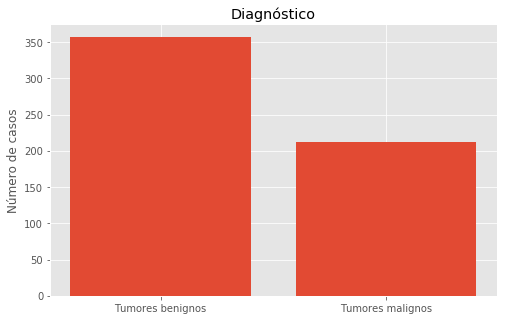

In [5]:
# Se cuentan los diagnósticos de tumores benignos y malignos
value_counts=pd.value_counts(data.diagnosis)

# Visualización de los diagnósticos en un gráfico de barras
plt.figure(figsize=(8,5))
plt.title("Diagnóstico")
plt.ylabel("Número de casos")
plt.bar(["Tumores benignos","Tumores malignos"],value_counts)
plt.show()

In [6]:
# El 70% de los datos es destinado al entrenamiento del modelo, mientras que el 30% es usado para su validación 
split=int(len(data)*0.7)

# Datos de entrenamiento
# Variables independientes
x_train=data.iloc[:split,2:-1] # de la columna "radius_mean" a "fractal_dimension_worst" 
# Variable dependiente
y_train=data.iloc[:split,1] # columna "diagnosis"

# Datos de prueba
# Variables independientes
x_test=data.iloc[split:,2:-1] # de la columna "radius_mean" a "fractal_dimension_worst" 
# Variable dependiente
y_test=data.iloc[split:,1] # columna "diagnosis"

In [7]:
len(y_test),len(y_train)

(171, 398)

In [8]:
# Se estandariza a las variables independientes
# Instancia
scaler=StandardScaler()
# Ajuste
scaler.fit(x_train)

# Transformación de los datos de entrenamiento y prueba
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

## 5. Algoritmo de clustering

En esta sección se pretende aplicar el algoritmo de K-Means (aprendizaje no supervisado) para agrupar a nuestros datos de entrenamiento. Idealmente se pretende que el algoritmo arroje $2$ clústers o grupos óptimos, puesto que los núcleos celulares únicamente pueden ser tumores benignos o tumores malignos. Si esto se cumple, el paso siguiente es ver qué elementos contiene cada clúster, en otras palabras, saber cuál es el grupo que concentra a los tumores benignos y cuál es el grupo que contiene a los tumores malignos. Esto será de gran utilidad para aplicar el modelo a los datos de prueba, pues éste les asignará el grupo al que pertenecen y, con lo hecho previamente, sabremos qué tipo de tumor son.

### 5.1 K-Means 

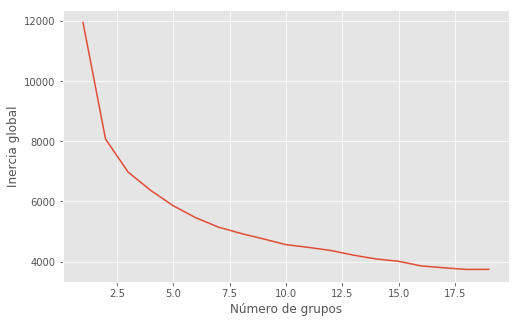

In [9]:
# Criterio del codo
# Semilla
semilla=5
# Matriz para guardar las inercias de 19 iteraciones
inercias=[]

# Se crean desde 1 hasta 19 clústers
for k in np.arange(1,20):
    model=KMeans(n_clusters=k,random_state=semilla,init="random")  
    # Se entrena al modelo
    model=model.fit(x_train_scaled)
    # Se calcula la inercia (varianza para el K-Mean) 
    inercias.append(model.inertia_)

# Visualización    
plt.figure(figsize=(8,5))
plt.plot(np.arange(1,20),inercias)
plt.xlabel("Número de grupos")
plt.ylabel("Inercia global")
plt.show()

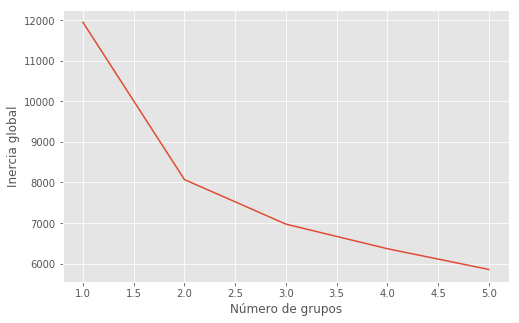

In [10]:
# Visualización    
plt.figure(figsize=(8,5))
plt.plot(np.arange(1,6),inercias[0:5])
plt.xlabel("Número de grupos")
plt.ylabel("Inercia global")
plt.show()

Por el criterio del codo se llega a que el número óptimo de clústers es de $2$, ya que es a partir de este punto donde la inercia disminuye a un ritmo decreciente si se agrupan los datos en más clústers. 

In [11]:
# Se ajusta el modelo a los datos de entrenamiento de tal forma que los datos se agrupen en 2 clústers 
model=KMeans(n_clusters=2,random_state=semilla,init="random")
model=model.fit(x_train_scaled)
# Número de grupo al que pertenecen los datos de entrenamiento
grupos=model.predict(x_train_scaled)
grupos

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

Aquí es necesario hacer notar que los $0$'s y $1$'s no representan el tipo de tumor, sino el número de clúster al que pertenece cada núcleo celular. Por lo tanto, tenemos al grupo $0$ y al grupo $1$.

In [12]:
# Vector con los clasificación por grupos hecha por el algoritmo (grupo 0, grupo 1)
grupos=pd.DataFrame(grupos,columns=["Grupos"])
# Vector con el diagnóstico del tipo de tumor (0-benigno, 1-maligno)
diagnóstico=pd.DataFrame(y_train)
# Se crea un nuevo DataFrame para saber qué contienen los grupos generados por el algoritmo de K-Means
comparar=grupos.join(diagnóstico)
comparar

,Grupos,diagnosis
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


In [13]:
# Se generan distintas variables que servirán como acumuladores para saber cuántos tumores benignos y malignos contiene cada grupo
grupo_0_tumores_m=0
grupo_0_tumores_b=0
grupo_1_tumores_m=0
grupo_1_tumores_b=0

# Iteración que nos permite hacer el conteo de los tumores benignos y malignos presentes en cada grupo
for i in range(len(comparar)):
    if comparar.iloc[i,0]==0:     # grupo 0
        if comparar.iloc[i,1]==1: # tumores malignos
            grupo_0_tumores_m+=1 
        else:                     # tumores benignos
            grupo_0_tumores_b+=1 
    elif comparar.iloc[i,0]==1:   # grupo 1
        if comparar.iloc[i,1]==1: # tumores malignos
            grupo_1_tumores_m+=1
        else:                     # tumores benignos
            grupo_1_tumores_b+=1

print("El grupo 0 contiene",grupo_0_tumores_m,"tumores malignos")
print("El grupo 0 contiene",grupo_0_tumores_b,"tumores benignos")
print("El grupo 1 contiene",grupo_1_tumores_m,"tumores malignos")
print("El grupo 1 contiene",grupo_1_tumores_b,"tumores benignos")

El grupo 0 contiene 143 tumores malignos
El grupo 0 contiene 10 tumores benignos
El grupo 1 contiene 30 tumores malignos
El grupo 1 contiene 215 tumores benignos


El grupo $0$ contiene $143$ tumores malignos, mientras que el grupo $1$ contiene $215$ tumores benignos; por lo que establecemos lo siguiente:

+ El clúster $0$ contiene a los tumores malignos.
+ El clúster $1$ contiene a los tumores benignos.

A su vez, los tumores que no pertenecen a las etiquetas que acabamos de definir para cada clúster pueden ser considerados como errores del modelo.

In [14]:
# Número de grupo al que pertenecen los datos de prueba
y_predict=model.predict(x_test_scaled)
y_predict

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1])

Para poder comparar la efectividad del algoritmo tenemos que modificar a la variable dependiente. Los tumores malignos, asignados arbitrariamente al número $1$, ahora serán asignados al número $0$, puesto que el clúster $0$ es el que los contiene. De igual forma, los tumores benignos, asignados arbitrariamente al número $0$, ahora serán asignados al número $1$, puesto que el clúster $1$ es el que los contiene. 

Como ejemplo: 
+ Si tenemos a un tumor maligno ($0$) y el algoritmo nos arroja que éste pertenece al grupo ($0$), en el que se encuentran mayoritariamente tumores malignos, entonces se acierta en la predicción. 
+ En cambio, si tenemos a un tumor benigno ($1$) y el algoritmo nos arroja que éste pertenece al grupo ($0$), en el que se encuentran mayoritariamente tumores malignos, entonces se fallará en la predicción.

In [15]:
# Nueva asignación a los diagnósticos de prueba
new_y_test=np.where(y_test==1,0,1)
new_y_test

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1])

In [16]:
# Matriz de confusión para evaluar la eficacia del modelo
confusion_matrix(new_y_test,y_predict)

array([[ 33,   6],
       [  5, 127]], dtype=int64)

Podemos notar que el agoritmo realiza un buen trabajo, ya que predice $33$ *true negatives* (clasifica a $33$ tumores que son malignos como malignos) y $127$ *true positives* (clasifica a $127$ tumores que son benignos como benignos). 

Por otra parte, los errores en el modelo son pocos, ya que el algoritmo clasifica a $6$ tumores que son malignos como benignos (*false positives*) y a $5$ tumores que son benignos como malignos (*false negatives*). 

In [17]:
# Precisión del modelo 
accuracy_score(new_y_test,y_predict)

0.935672514619883

En el 93% de los casos nuestro modelo acertará en la asignación de grupo, (grupo $0$-tumor maligno, grupo $1$-tumor maligno), para los núcleos celulares que se le presenten. Por lo que, en pocas palabras, el algoritmo de K-Means sí pudo encontrar patrones en la base de datos proporcionada, generando un buen modelo matemático.

## 6. Análisis del componente principal (ACP)

En esta sección se busca aplicar el algoritmo de análisis del componente principal a las variables independientes para reducir su dimensionalidad. El objetivo de esto es obtener un nuevo sistema coordenado para el conjunto de datos original, en el que los primeros componentes principales describan la mayor varianza de los datos. Los componentes con los que se capture la mayor información serán los empleados en la regresión logística.    

In [18]:
# Análisis del componente principal
# Instancia
pca=PCA(n_components=len(x_train_scaled[0])) # 30 componentes
# Ajuste
pca.fit(x_train_scaled)
# Transformación
x_train_pca=pca.transform(x_train_scaled)

In [19]:
# Visualización de los componentes principales
pd.DataFrame(x_train_pca)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,8.554275,1.649435,-0.487311,-4.259086,-0.505047,0.933263,2.134137,0.131365,0.065748,-0.601173,...,0.050046,0.092404,-0.039121,0.173484,-0.193420,-0.225738,-0.180085,0.047671,0.042907,-0.043950
1,2.003706,-3.749048,-0.158764,-0.941152,0.967273,0.014924,-0.066037,-0.148802,-0.739117,0.656025,...,0.000428,-0.043836,0.232600,-0.139490,-0.105841,-0.008968,0.151791,-0.026613,0.001738,-0.000203
2,5.285646,-1.193907,-0.296675,-1.025814,0.139660,0.368083,-0.696665,-0.002363,-0.008953,0.526583,...,-0.291994,0.201468,-0.088033,-0.049636,0.154631,-0.015364,0.050363,-0.040446,0.003598,0.005970
3,6.696470,9.607119,-3.507894,-1.261922,-2.465752,2.294338,1.203901,-1.465030,-0.926430,-0.727723,...,-0.476323,0.155232,0.117419,-0.176756,0.074580,-0.185467,0.223234,-0.032300,-0.061889,-0.021792
4,3.439713,-1.980231,1.929467,-2.556898,0.808621,-1.371552,-0.964945,-0.299969,-0.318348,0.139966,...,0.085608,-0.160185,-0.086416,0.015168,0.014657,0.039327,0.004883,0.034936,0.005122,0.018999
5,2.024711,3.676702,-2.801772,-1.498030,-0.720403,-0.706236,0.418502,0.181899,-0.113849,-0.390202,...,-0.045646,-0.072650,-0.041922,0.029369,0.107722,-0.041803,-0.070959,0.005527,-0.020755,0.002485
6,1.911213,-2.696348,-1.432020,-0.262346,0.331364,-0.138118,-0.328382,0.073836,-0.067138,0.053970,...,0.139113,0.013109,0.198949,-0.036591,-0.233486,-0.008336,0.017200,0.045800,-0.008282,0.005494
7,1.883207,2.144059,-0.989356,-0.023222,-1.329410,-1.295254,0.897136,0.519372,0.138313,1.125891,...,-0.065807,0.084228,0.206372,-0.213991,-0.171778,-0.016374,0.057298,-0.015339,-0.002481,-0.000941
8,2.880813,3.152158,-3.207446,-0.080996,-1.248344,0.379966,-0.207834,0.679411,0.416837,0.351286,...,0.092752,0.222039,-0.062492,0.117187,0.072217,-0.026825,0.062983,-0.027457,0.012459,0.007217
9,5.962056,7.190809,-4.767515,2.589624,1.512645,-0.998662,2.339404,-0.645656,-0.523545,-1.192631,...,-0.230857,-0.546041,-0.189314,-0.071724,0.135059,0.274292,-0.076470,-0.096787,0.034841,0.002404


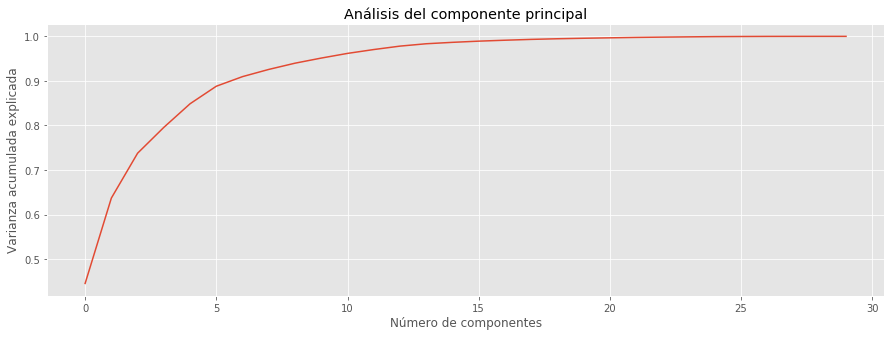

In [20]:
# Varianza explicada por cada componente principal
var_expl=pca.explained_variance_ratio_

# Visualización de la varianza acumulada explicada por los componentes principales
plt.figure(figsize=(15,5))
plt.plot(np.cumsum(var_expl))
plt.title("Análisis del componente principal")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza acumulada explicada")
plt.show()

In [21]:
# Varianza acumulada explicada
np.cumsum(var_expl)

array([0.44562848, 0.63718204, 0.73782146, 0.79581018, 0.84877912,
       0.88811446, 0.90967988, 0.92582297, 0.93979686, 0.9512718 ,
       0.96176   , 0.97040519, 0.97809676, 0.98340691, 0.98657017,
       0.98924068, 0.99131779, 0.99317999, 0.99461432, 0.99573352,
       0.99669673, 0.99761185, 0.99828426, 0.99888442, 0.99942271,
       0.99968035, 0.99991329, 0.99996722, 0.99999546, 1.        ])

Puede observarse que con los primeros $6$ componentes principales se captura cerca del $90$% de la información. Estos primeros seis componentes serán los usados para el modelo de aprendizaje supervisado. 

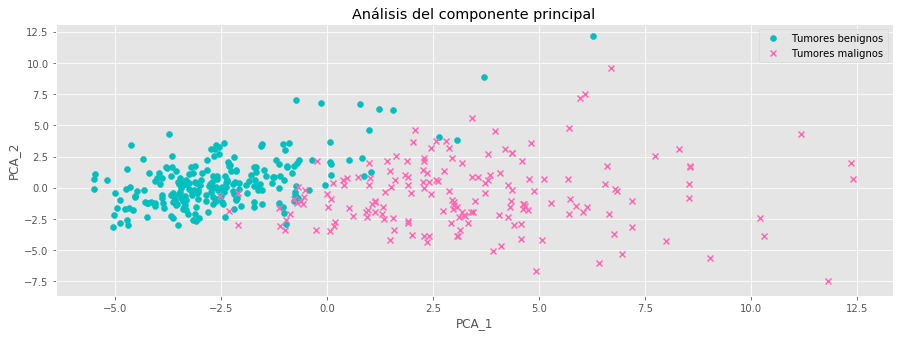

In [22]:
# Aquí se pretende visualizar a los dos primeros componentes principales obtenidos en un gráfico de dispersión
# A cada punto se le asignará la clasificación a la que pertenece (tumor benigno o tumor maligno), esto con el fin de visualizar posibles patrones en la aglomeración de los datos
index_0=y_train[y_train==0].index
index_1=y_train[y_train==1].index
t_benigno=x_train_pca[index_0]
t_maligno=x_train_pca[index_1]

# Visualización 
plt.figure(figsize=(15,5))
b=plt.scatter(t_benigno[:,0],t_benigno[:,1],marker="o",c="c")
m=plt.scatter(t_maligno[:,0],t_maligno[:,1],marker="x",c="hotpink")
plt.legend((b,m),("Tumores benignos","Tumores malignos"))
plt.title("Análisis del componente principal")
plt.xlabel("PCA_1")
plt.ylabel("PCA_2")
plt.show()

Con los primeros dos componentes principales, a pesar de que estos capturan únicamente el $63$% de la información, puede observarse que sí se forman patrones, ya que los tumores benignos se concentran en un sector del eje coordenado, mientras que los tumores malignos se concentran en otro sector del eje coordenado. 

In [23]:
# Se obtienen los primeros 6 componentes principales para los datos de entrenamiento
x_train_pca=x_train_pca[:,0:6]
x_train_pca

array([[ 8.55427541,  1.64943525, -0.48731058, -4.25908567, -0.50504664,
         0.93326314],
       [ 2.0037064 , -3.74904821, -0.15876375, -0.94115152,  0.96727335,
         0.01492426],
       [ 5.28564589, -1.19390694, -0.29667505, -1.0258137 ,  0.13965954,
         0.36808327],
       ...,
       [-3.09345277, -1.54361727,  0.31610307,  0.77666915,  0.2686155 ,
         0.48129739],
       [-0.74198397,  0.12412511, -1.00120221,  0.36340841,  0.11634161,
        -0.67478957],
       [-2.19397562, -0.53028672,  1.56956888,  0.22896675,  1.82121049,
         0.19092031]])

In [24]:
# Se transforman los datos de prueba al nuevo sistema coordenado
x_test_pca=pca.transform(x_test_scaled)
# Se obtienen los primeros 6 componentes principales para los datos de prueba
x_test_pca=x_test_pca[:,0:6]
x_test_pca

array([[-4.01551784e+00, -2.61701650e-01, -8.53119061e-01,
        -3.92603399e-01,  1.56816313e+00, -4.51643860e-03],
       [-2.89202018e+00, -1.70842337e-01, -3.06929936e-01,
         9.13532372e-02, -6.26364288e-02,  1.12112046e-01],
       [ 5.83526591e+00,  1.75492677e+00, -2.99564831e+00,
        -7.39333888e-01,  4.86065107e-01, -1.38227420e+00],
       ...,
       [ 1.01406937e+00, -1.86755197e+00,  3.40455384e-01,
         2.52139010e+00,  1.50061461e+00, -4.55372024e-01],
       [ 9.92138380e+00,  1.35238753e+00, -2.09666275e+00,
         1.74867618e+00,  4.05493662e-03,  4.11123291e-01],
       [-5.45601426e+00, -5.20196778e-01,  1.00384707e+00,
         2.69159328e+00, -5.05080141e-01,  1.53916885e+00]])

## 7. Algoritmo de predicción

En esta sección, se buscará aplicar un método mátematico para poder predecir el comportamiento de los tumores de cáncer de mama, en específico, se decidió utilizar un algoritmo de Regresión Logistíca para lograr este objetivo, debido a que, al utilizarlo, se buscará clasificar a las células en dos grupos: 

+ $1$: Tumor maligno
+ $0$: Tumor Benigno   

Este tipo de regresión es muy útil para lograr predecir y clasificar datos binarios, así que se procederá a hacerlo.

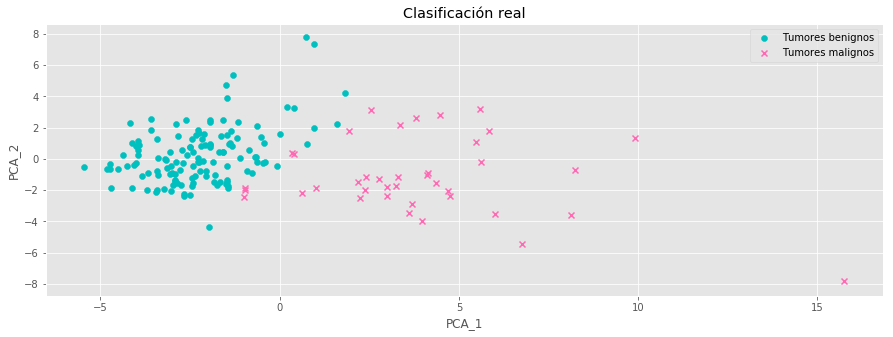

In [25]:
# Visualización de la clasificación real
# Aquí se pretende visualizar a los dos primeros componentes principales obtenidos en un gráfico de dispersión
# A cada punto se le asignará su clasificación real (tumor benigno o tumor maligno)
y_test_1=pd.Series(y_test.values)
index_0=y_test_1[y_test_1==0].index
index_1=y_test_1[y_test_1==1].index
t_benigno=x_test_pca[index_0]
t_maligno=x_test_pca[index_1]

# Visualización 
plt.figure(figsize=(15,5))
b=plt.scatter(t_benigno[:,0],t_benigno[:,1],marker="o",c="c")
m=plt.scatter(t_maligno[:,0],t_maligno[:,1],marker="x",c="hotpink")
plt.legend((b,m),("Tumores benignos","Tumores malignos"))
plt.title("Clasificación real")
plt.xlabel("PCA_1")
plt.ylabel("PCA_2")
plt.show()

### 7.1 Regresión logística

In [26]:
# Se cra una variable de regresion logistica y se ajusta a los datos de entrenamiento
log_reg = LogisticRegression()
log_reg.fit(x_train_pca,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
# Se predicen los datos de la regresion lineal
y_predict_lr = log_reg.predict(x_test_pca)
# Se imprime el nivel de exito del modelo
accuracy_score(y_test, y_predict_lr)

0.9590643274853801

In [28]:
# Matriz de confusión para evaluar la eficacia del modelo
confusion_matrix(y_test,y_predict_lr)

array([[125,   7],
       [  0,  39]], dtype=int64)

Al observar el accuracy del modelo, podemos notar que el modelo de regresion logística tiene muy buenas predicciones, incluso mejores que las del clúster, nuestro modelo acierta con un $95$% de efectividad si el cáncer de mama es benigno o maligno.  
  
Este nivel de efectividad es muy bueno, ya que muchas veces es muy complejo crear un modelo matematico con este nivel de confianza.

Podemos notar que el agoritmo realiza un buen trabajo, ya que predice $125$ *true negatives* (clasifica a $125$ tumores que son benignos como benignos) y $39$ *true positives* (clasifica a $39$ tumores que son malignos como malignos). 

Por otra parte, los errores en el modelo son pocos, ya que el algoritmo no clasifica a tumores que son malignos como benignos (*false negatives*) y a $7$ tumores que son benignos como malignos (*false positives*). 

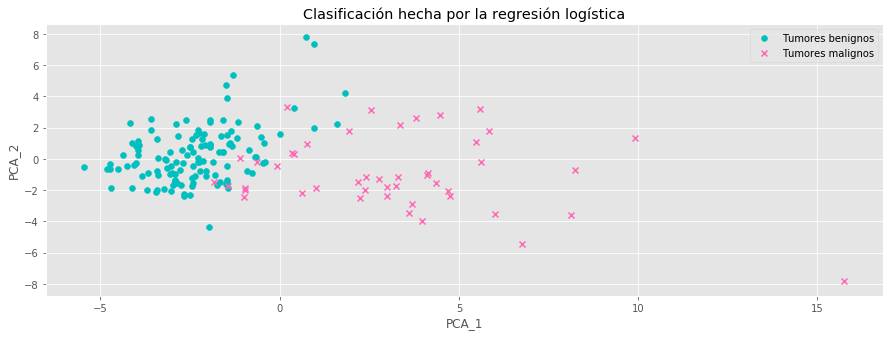

In [29]:
# Visualización de la clasificación hecha por la regresión logística
# Aquí se pretende visualizar a los dos primeros componentes principales obtenidos en un gráfico de dispersión
# A cada punto se le asignará la clasificación que le asignó el algoritmo (tumor benigno o tumor maligno)
y_predict_lr=pd.Series(y_predict_lr)
index_0=y_predict_lr[y_predict_lr==0].index
index_1=y_predict_lr[y_predict_lr==1].index
t_benigno=x_test_pca[index_0]
t_maligno=x_test_pca[index_1]

# Visualización 
plt.figure(figsize=(15,5))
b=plt.scatter(t_benigno[:,0],t_benigno[:,1],marker="o",c="c")
m=plt.scatter(t_maligno[:,0],t_maligno[:,1],marker="x",c="hotpink")
plt.legend((b,m),("Tumores benignos","Tumores malignos"))
plt.title("Clasificación hecha por la regresión logística")
plt.xlabel("PCA_1")
plt.ylabel("PCA_2")
plt.show()

## 8. Conclusiones

+ El objetivo principal del proyecto se cumple, pues se lograron obtener dos modelos matemáticos para la detección del cáncer de mama.
+ El mejor modelado en este caso fue el de Regresión Logística ya que se logró obtener una exactitud del 95% contra una del 93% del K-Means.  
+ Si sirvió reducir variables por medio del algoritmo PCA (análisis del componente principal), ya que puede ser uno de los factores por el cual se consiguió una mejor salida para el modelo de regresión logística.

### 8.1 K-Means  

El aprendizaje no supervisado demostró un buen desempeño para la clasificación de los tumores, ya que el algoritmo de clustering K-Means logró una exactitud del 93%. Cabe resaltar que se llegó a que el número de clústers óptimo es de 2, en los cuales los datos originales se agruparon de acuerdo a ciertos patrones; pues un grupo contenía, en su mayoría, a los tumores malignos, mientras que el otro almacenaba, en su mayoría, a los tumores benignos. Se recalca que, a pesar de la simplicidad de este modelo, sí parece realizar un buen trabajo cuando realmente existen patrones en nuestros datos.

### 8.2 Análisis del componente principal  

Se logró reduciar la dimensionalidad de los datos mediante el análisis del componente principal, pues originalmente el dataset extraído de la plataforma Kaggle contenía demasiados atributos que podrían haber ocasionado numerosos problemas al momento de estimar la regresión logística, como la correlación de variables, lo cual afectaría a las estimaciones futuras. 

Gracias a este algoritmo se pasó de tener 30 columnas a sólo 6 (los primeros seis componentes principales), que aportan cerca del 90% de la información original. Lo anterior resultó conveniente, pues se generaron nuevas variables que no presentan correlación alguna y se redujo la carga computacional del algoritmo. Además, con tan sólo los dos primeros componentes principales se pudieron observar claros patrones en los datos, ya que los tumores se agruparon de acuerdo a su clasificación. 

### 8.3 Regresión logística  

Un modelo de regresión logistica, como se menciono previamente, nos ayuda a poder predecir el comportamiento de algún hecho, estadísticamente, la mayoría de los modelos de regresión logistica, alcanzan niveles de confianza de 70%, pero en nuestro caso, logramos conseguir un modelo con una efectividad de más del 95% lo cual es demasiado bueno.  

Incluso, si se le agrega información a la base de datos, podríamos lograr, con la efectividad lograda, saber de manera casi segura si el tumor será un cancer benigno o maligno, lo cual es muy útil y practico para la detección y combatimiento del cancer de mamá.  

Las herramientas utilizadas a traves del curso nos apoyaron para lograr cumplir con el objetivo del proyecto y a tener el aprendizaje esperado, de igual forma, los modelos utilizados en este proyecto, se aplicaron de buena manera lo cual se refleja en los buenos resultados del proyecto, por lo cual, se concluye que se lograron los objetivos, ya que el modelo es capaz de predecir con un error poco significativo el tipo de tumor.

## 9. Referencias consultadas

+ Cancer.Net. (2018). Cáncer de mama: Introducción. Consultado el 26 de abril del 2020, de ASCO. Recuperado de https://www.cancer.net/es/tipos-de-cáncer/cáncer-de-mama/introducción
+ UCI Machine Learning. (2016). Breast Cancer Wisconsin (Diagnostic) Data Set. Consultado el 26 de abril del 2020, de Kaggle. Recuperado de https://www.kaggle.com/uciml/breast-cancer-wisconsin-data